**Imports and workspace setting**

In [57]:
import csv
import math
import os

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stat

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

**Loading crime-data and preview**

In [58]:
crime_data = pd.read_csv('../data/Crime_data_2012.csv')

crime_data = crime_data.T

column_names = crime_data.iloc[0]
columns = column_names.tolist()
crime_data.columns = columns

crime_data = crime_data.iloc[1:]
crime_data = crime_data.sort_index()

crime_data.to_csv('out.csv')
crime_data = pd.read_csv('out.csv')
crime_data.rename(columns={'Unnamed: 0':'District'},inplace=True)
#crime_data.set_index("District",drop=True,inplace=True)

print("Data set size : ", crime_data.shape)

crime_data.head()

Data set size :  (25, 23)


,District,Abduction / Kidnapping,Arson,Mischief over Rs.5000/=,H.B. & Theft,Grevious Hurt,Hurt by Knife etc.,Homicide/Abet. To commit suicide,Attempted Homicide,Rape / Incest,...,Extortion,"Cheating/Misappropriation C.B. Trust > Rs.100,000",Theft of Property (praedial produce > Rs.5000),Counterfeiting Currency,Offences against State,Cruelty & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs"
0,Ampara,29,31,36,239,69,38,16,12,37,...,2,232,242,1,0,1,2,1,0,1
1,Anuradhapura,68,47,107,834,108,72,24,15,199,...,9,270,584,6,0,23,2,4,1,7
2,Badulla,38,14,42,359,112,85,28,11,73,...,1,138,296,1,0,2,0,3,0,20
3,Batticaloa,21,33,38,227,56,89,11,2,52,...,4,225,221,1,0,6,3,1,1,3
4,Colombo,154,22,140,2996,248,379,62,21,120,...,37,1736,2809,4,0,52,1,21,6,573


**Loading Employment by Industrical sector** 

In [59]:
emplyment_data = pd.read_csv('../data/Employees by industrial sector (% to total employment).csv')

emplyment_data = emplyment_data.sort_values(by = ['District'])
emplyment_data = emplyment_data.reset_index(drop=True)
## Rename column with a better name
emplyment_data.rename(columns={'Total':'Total Male Employment'}, inplace=True)
## Drop provice column
emplyment_data = emplyment_data.drop('Province', 1)

emplyment_data.head()

,District,Male emp. Agriculture,Male emp. Industry,Male emp. Services,Total Male Employment,Female emp. Agriculture,Female emp. Industry,Female emp. Services,Female emp. Total,Total emp. Agriculture,Total emp. Industry,Total emp. Services,Total employment
0,Ampara,13.8,19.0,26.9,59.7,1.8,4.1,44.7,50.6,11.3,15.9,30.6,57.8
1,Anuradhapura,3.7,6.0,27.0,36.7,1.7,5.5,18.0,25.2,2.9,5.8,23.5,32.2
2,Badulla,17.0,9.9,21.5,48.4,23.7,4.8,17.3,45.8,19.6,7.9,19.9,47.4
3,Batticaloa,20.9,18.1,26.0,64.9,2.1,4.0,33.2,39.3,16.6,14.8,27.6,59.0
4,Colombo,1.1,20.6,42.9,64.7,1.3,20.0,50.5,71.7,1.2,20.4,45.4,67.0


Data set size =  (25, 13)
Dimension =  2


Text(0.5, 1.0, 'Male-Female Employment')

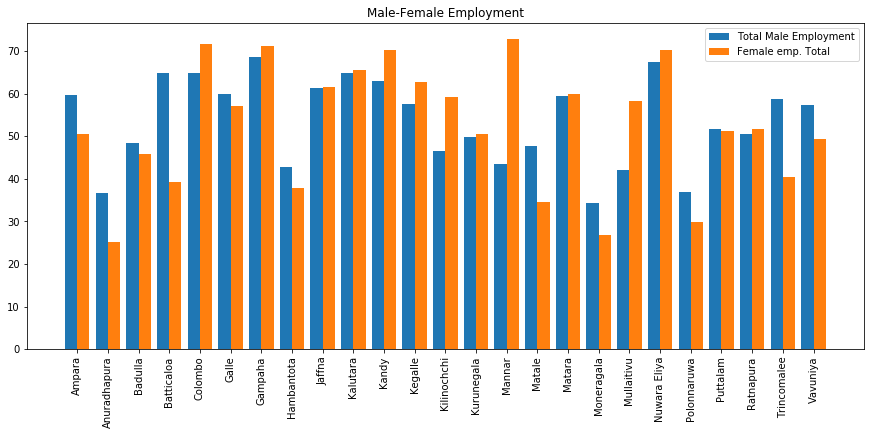

In [60]:
print('Data set size = ', emplyment_data.shape)
print('Dimension = ', emplyment_data.ndim)
#emplyment_data.iloc[:,[5,13]].plot.bar(figsize=(15, 10))

#plot data
ind = np.arange(25)    # the x locations for the groups
width = 0.4   
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(ind, emplyment_data['Total Male Employment'],width=0.4)
ax.bar(ind+width, emplyment_data['Female emp. Total'],width=0.4)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(emplyment_data.District.tolist(),rotation='vertical')
ax.legend(['Total Male Employment','Female emp. Total'])
ax.set_title('Male-Female Employment')

**Loading Accomadation for tourist data**

In [61]:
hotels_data = pd.read_csv('../data/Information for Accommodation.csv')

## Drop uninterested columns
hotels_data = hotels_data.drop('Address', 1)
hotels_data = hotels_data.drop('AGA Division', 1)
hotels_data = hotels_data.drop('PS/MC/UC', 1)

hotels_data = hotels_data.sort_values(by = ['District'])
hotels_data.head()

,Type,Name,Rooms,Grade,District,Logitiute,Latitude
1694,Home Stay Units,SAJANI'S HOME,1,STANDARD,Ampara,NaN,NaN
1180,Guest Houses,SEA BREEZE RESTAURANT & GUEST INN,7,C,Ampara,81.840089,7.408089
1688,Home Stay Units,THARAKA SURF GUEST,5,STANDARD,Ampara,NaN,NaN
1689,Home Stay Units,WELCOME HOUSE,1,STANDARD,Ampara,81.808772,6.758059
1690,Home Stay Units,PANAMA VILLAGE HOME,4,STANDARD,Ampara,NaN,NaN


In [62]:
print('Data set size = ', hotels_data.shape)
print('Number districts = ', len(hotels_data.District.unique()))

Data set size =  (2130, 7)
Number districts =  25


**Roll Up accommodation data by district using groupby feature**

We count number of rooms available tourist rooms in each district to measure to popularity of tourism in the island district-wise

In [63]:
room_count_by_district = pd.core.frame.DataFrame({'Rooms' : hotels_data.groupby( [ "District"] ).Rooms.sum()}).reset_index()
room_count_by_district.head()

,District,Rooms
0,Ampara,610
1,Anuradhapura,979
2,Badulla,765
3,Batticaloa,883
4,Colombo,7519


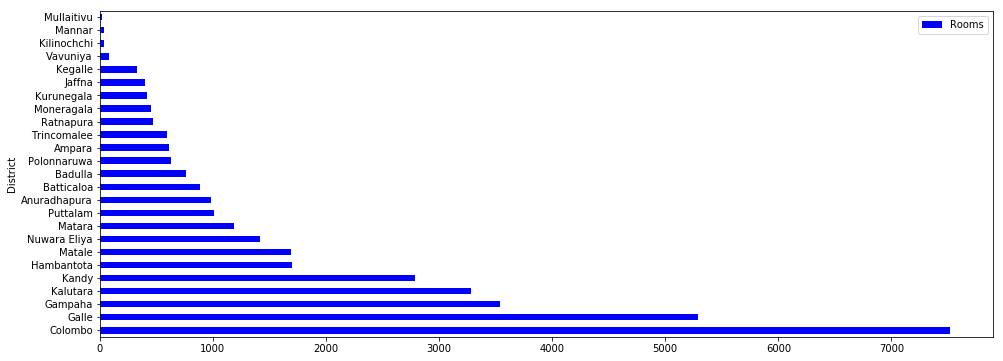

In [64]:
copy_To_Plot = room_count_by_district.set_index('District')
copy_To_Plot.sort_values(by = ['Rooms'], inplace=True, ascending=False)

copy_To_Plot.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

**Loading Population data and handle missing values in Chilaw**

In [65]:
population_data = pd.read_csv('../data/population_by_district_in_census_years.csv')

population_data = population_data.sort_values(by = ['District'])
population_data

,District,1871,1881,1891,1901,1911,1921,1931,1946,1953,1963,1971,1981,2001,2012
15,Ampara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211.7,272.6,388.9,593.0,648.06
20,Anuradhapura,63.7,66.1,75.3,79.1,86.3,96.5,97.4,139.5,229.3,279.8,388.8,587.9,745.7,856.23
22,Badulla,129.0,165.7,159.2,186.7,216.7,233.9,303.2,372.2,466.9,521.8,615.4,641.0,780.0,811.76
14,Batticaloa,93.1,105.4,122.7,145.2,153.9,158.7,174.9,203.2,270.5,196.1,256.7,330.3,486.4,525.14
19,Chilaw,NaN,NaN,63.2,74.4,87.6,102.4,114.6,139.8,170.1,NaN,NaN,NaN,NaN,NaN
0,Colombo,430.0,506.5,578.9,690.8,826.8,923.1,1081.2,1420.3,1708.7,2207.4,2672.3,1699.2,2251.3,2309.81
6,Galle,194.4,209.7,222.9,258.1,291.0,313.1,363.6,459.8,524.4,641.5,735.2,814.5,990.5,1058.77
1,Gampaha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1390.9,2063.7,2294.64
8,Hambantota,60.9,71.9,89.3,104.9,110.5,119.6,124.4,149.7,191.5,274.3,340.3,424.3,526.4,596.62
9,Jaffna,246.1,265.6,279.3,300.9,326.7,330.5,355.4,424.8,491.8,612.6,701.6,830.6,490.6,583.38


In [66]:
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

result = sm.ols(formula='Q("1963") ~ Q("1953")', data=population_data.dropna()).fit()
population_data['1963'] = population_data['1963'].fillna(result.predict(population_data['1953']))

result = sm.ols(formula='Q("1971") ~ Q("1963")', data=population_data.dropna()).fit()
population_data['1971'] = population_data['1971'].fillna(result.predict(population_data['1963']))

result = sm.ols(formula='Q("1981") ~ Q("1971")', data=population_data.dropna()).fit()
population_data['1981'] = population_data['1981'].fillna(result.predict(population_data['1971']))

result = sm.ols(formula='Q("2001") ~ Q("1981")', data=population_data.dropna()).fit()
population_data['2001'] = population_data['2001'].fillna(result.predict(population_data['1981']))

result = sm.ols(formula='Q("2012") ~ Q("2001")', data=population_data.dropna()).fit()
population_data['2012'] = population_data['2012'].fillna(result.predict(population_data['2001']))

population_data.head(10)

,District,1871,1881,1891,1901,1911,1921,1931,1946,1953,1963,1971,1981,2001,2012
15,Ampara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211.700000,272.600000,388.900000,593.000000,648.060000
20,Anuradhapura,63.7,66.1,75.3,79.1,86.3,96.5,97.4,139.5,229.3,279.800000,388.800000,587.900000,745.700000,856.230000
22,Badulla,129.0,165.7,159.2,186.7,216.7,233.9,303.2,372.2,466.9,521.800000,615.400000,641.000000,780.000000,811.760000
14,Batticaloa,93.1,105.4,122.7,145.2,153.9,158.7,174.9,203.2,270.5,196.100000,256.700000,330.300000,486.400000,525.140000
19,Chilaw,NaN,NaN,63.2,74.4,87.6,102.4,114.6,139.8,170.1,223.315444,266.741248,422.704197,511.933134,557.622384
0,Colombo,430.0,506.5,578.9,690.8,826.8,923.1,1081.2,1420.3,1708.7,2207.400000,2672.300000,1699.200000,2251.300000,2309.810000
6,Galle,194.4,209.7,222.9,258.1,291.0,313.1,363.6,459.8,524.4,641.500000,735.200000,814.500000,990.500000,1058.770000
1,Gampaha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1390.900000,2063.700000,2294.640000
8,Hambantota,60.9,71.9,89.3,104.9,110.5,119.6,124.4,149.7,191.5,274.300000,340.300000,424.300000,526.400000,596.620000
9,Jaffna,246.1,265.6,279.3,300.9,326.7,330.5,355.4,424.8,491.8,612.600000,701.600000,830.600000,490.600000,583.380000


**Merge all 4 datasets in to one pandas frame**

In [68]:
## Check equlaity of District names in all 3 datasets
print('Crime_data districts = ', len(crime_data.District.unique()))
print('Employment_data districts = ', len(emplyment_data.District.unique()))
print('Tourism_data districts = ', len(room_count_by_district.District.unique()))
print('Population_data districts = ', len(population_data.District.unique()))

Crime_data districts =  25
Employment_data districts =  25
Tourism_data districts =  25
Population_data districts =  26


In [69]:
result = pd.merge(room_count_by_district, emplyment_data, on='District', how='outer')
result = pd.merge(result, crime_data, on='District', how='outer')
result = pd.merge(result, population_data[['District','2012']], on='District', how='outer')

print ('Integrated dataframe shape = ', result.shape)
result.to_csv('../data/integrated_data.csv')
result.head(50)

Integrated dataframe shape =  (26, 37)


,District,Rooms,Male emp. Agriculture,Male emp. Industry,Male emp. Services,Total Male Employment,Female emp. Agriculture,Female emp. Industry,Female emp. Services,Female emp. Total,...,"Cheating/Misappropriation C.B. Trust > Rs.100,000",Theft of Property (praedial produce > Rs.5000),Counterfeiting Currency,Offences against State,Cruelty & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs",2012
0,Ampara,610.0,13.8,19.0,26.9,59.7,1.8,4.1,44.7,50.6,...,232.0,242.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,648.060000
1,Anuradhapura,979.0,3.7,6.0,27.0,36.7,1.7,5.5,18.0,25.2,...,270.0,584.0,6.0,0.0,23.0,2.0,4.0,1.0,7.0,856.230000
2,Badulla,765.0,17.0,9.9,21.5,48.4,23.7,4.8,17.3,45.8,...,138.0,296.0,1.0,0.0,2.0,0.0,3.0,0.0,20.0,811.760000
3,Batticaloa,883.0,20.9,18.1,26.0,64.9,2.1,4.0,33.2,39.3,...,225.0,221.0,1.0,0.0,6.0,3.0,1.0,1.0,3.0,525.140000
4,Colombo,7519.0,1.1,20.6,42.9,64.7,1.3,20.0,50.5,71.7,...,1736.0,2809.0,4.0,0.0,52.0,1.0,21.0,6.0,573.0,2309.810000
5,Galle,5287.0,15.2,21.1,23.7,60.0,14.8,17.6,24.7,57.1,...,249.0,363.0,3.0,0.0,4.0,3.0,26.0,2.0,65.0,1058.770000
6,Gampaha,3543.0,3.3,31.4,33.7,68.5,1.0,34.5,35.7,71.2,...,1266.0,1910.0,9.0,0.0,67.0,2.0,26.0,3.0,75.0,2294.640000
7,Hambantota,1695.0,9.4,14.6,18.9,42.8,3.1,13.1,21.7,37.9,...,218.0,274.0,1.0,0.0,1.0,0.0,8.0,2.0,56.0,596.620000
8,Jaffna,397.0,8.1,22.6,30.7,61.3,10.8,7.3,43.4,61.5,...,211.0,191.0,0.0,1.0,9.0,1.0,2.0,0.0,3.0,583.380000
9,Kalutara,3285.0,5.3,23.8,35.6,64.7,11.0,19.4,35.2,65.6,...,301.0,725.0,0.0,0.0,41.0,0.0,4.0,0.0,83.0,1217.260000


**Correlation analysis for Tourism**

Text(0.5, 1.0, 'Room count Correlation')

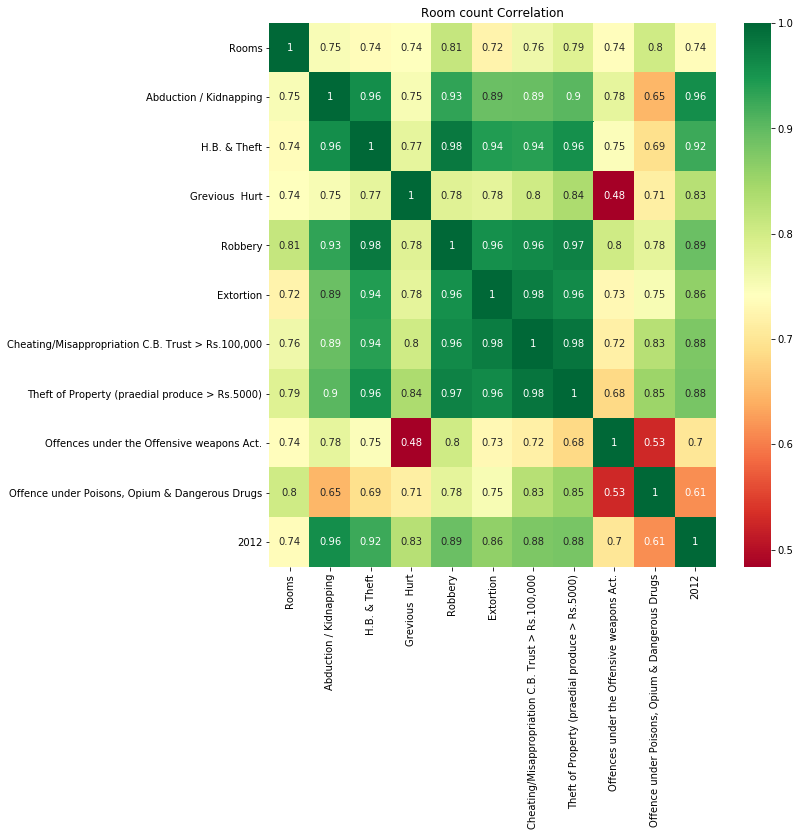

In [70]:
allCorrelations = result.corr(method='pearson')

## Extract high correlations to Drugs
topCorrFeatures = allCorrelations.index[abs(allCorrelations['Rooms']) >= 0.7]
plt.figure(figsize=(10,10))
ax = sns.heatmap(result[topCorrFeatures].corr(), annot=True, cmap="RdYlGn")
ax.set_title('Room count Correlation')

**Correlation analysis for Female employment in industrial sector**

Text(0.5, 1.0, 'Female employment in industrial sector Correlation')

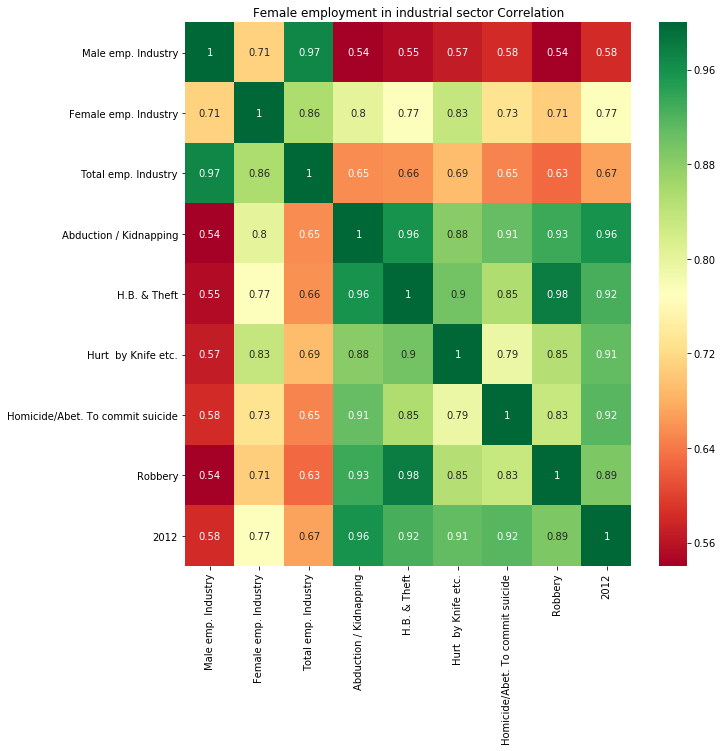

In [71]:
allCorrelations = result.corr(method='pearson')

## Extract high correlations to Drugs
topCorrFeatures = allCorrelations.index[abs(allCorrelations['Female emp. Industry']) >= 0.7]
plt.figure(figsize=(10,10))
ax = sns.heatmap(result[topCorrFeatures].corr(), annot=True, cmap="RdYlGn")
ax.set_title('Female employment in industrial sector Correlation')

**Correlation analysis for population data**

Text(0.5, 1.0, 'Population data of 2012 Correlation')

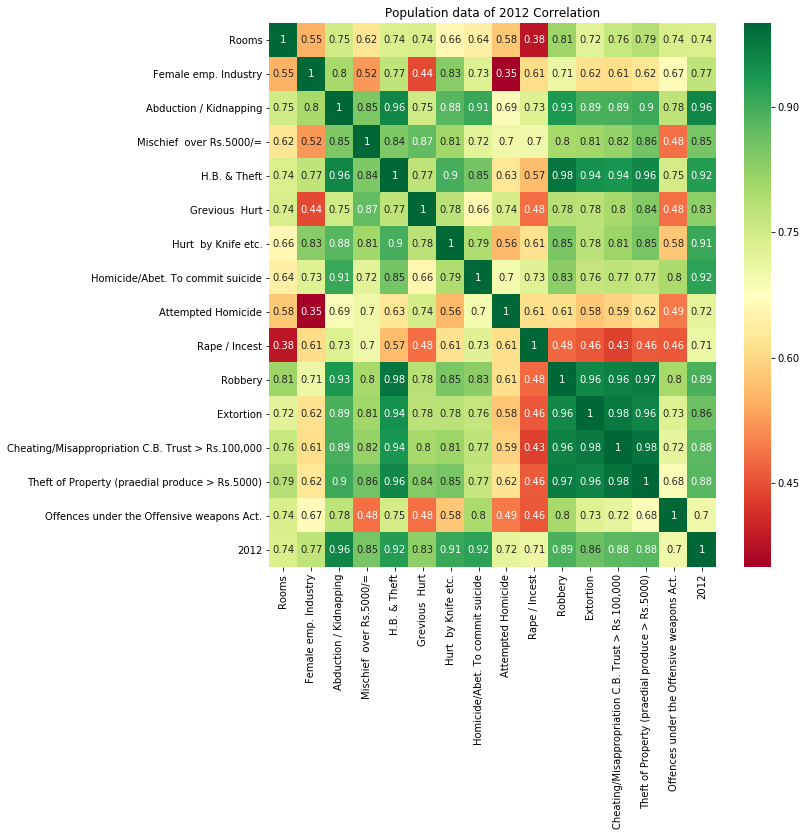

In [72]:
allCorrelations = result.corr(method='pearson')

## Extract high correlations to Drugs
topCorrFeatures = allCorrelations.index[abs(allCorrelations['2012']) >= 0.7]
plt.figure(figsize=(10,10))
ax = sns.heatmap(result[topCorrFeatures].corr(), annot=True, cmap="RdYlGn")
ax.set_title('Population data of 2012 Correlation')

Text(0.5, 1.0, 'Theft Correlation')

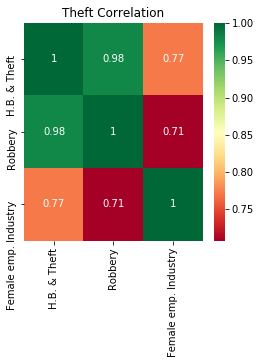

In [73]:
result_roberry_against_emp = pd.concat([crime_data.iloc[:,[4,11]], emplyment_data.iloc[:,1:]], axis=1)
result_roberry_against_emp.head()

corrValues = result_roberry_against_emp.corr(method='pearson')
topCorrFeatures = corrValues.index[abs(corrValues['H.B. & Theft']) >= 0.7]

plt.figure(figsize=(4,4))
ax = sns.heatmap(result_roberry_against_emp[topCorrFeatures].corr(), annot=True, cmap="RdYlGn")
ax.set_title('Theft Correlation')

Text(0, 0.5, 'Total emp. Industry')

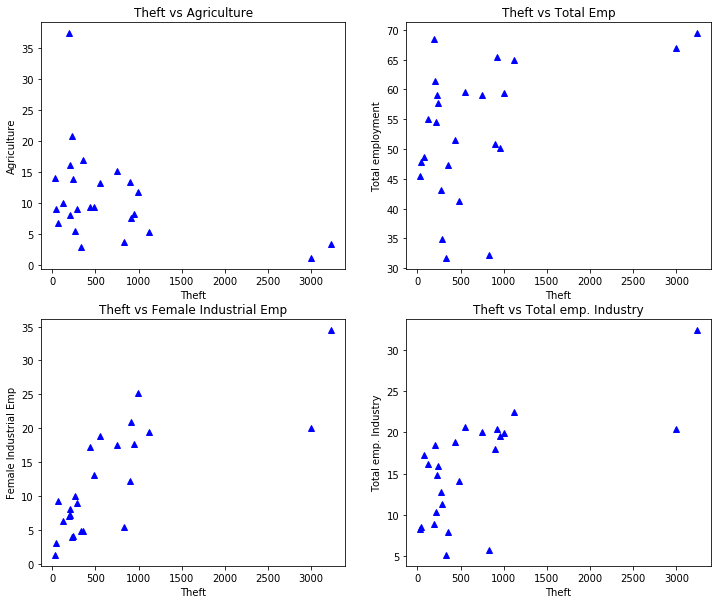

In [74]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
plt.plot(result_roberry_against_emp['H.B. & Theft'], result_roberry_against_emp['Male emp. Agriculture'], 'b^')
plt.title('Theft vs Agriculture')
plt.xlabel("Theft")
plt.ylabel("Agriculture")

plt.subplot(2,2,2)
plt.plot(result_roberry_against_emp['H.B. & Theft'], result_roberry_against_emp['Total employment'], 'b^')
plt.title('Theft vs Total Emp')
plt.xlabel("Theft")
plt.ylabel("Total employment")

plt.subplot(2,2,3)
plt.plot(result_roberry_against_emp['H.B. & Theft'], result_roberry_against_emp['Female emp. Industry'], 'b^')
plt.title('Theft vs Female Industrial Emp')
plt.xlabel("Theft")
plt.ylabel("Female Industrial Emp")

plt.subplot(2,2,4)
plt.plot(result_roberry_against_emp['H.B. & Theft'], result_roberry_against_emp['Total emp. Industry'], 'b^')
plt.title('Theft vs Total emp. Industry')
plt.xlabel("Theft")
plt.ylabel("Total emp. Industry")

**Hypothesis identfied**

1. Popular tourism cities caused lot of crimes including 
        1. Robbery (0.81)
        2. Dangeroud drugs (0.8)
        3. H.B. & Theft
        4. Kidnapping
        5. Offences with weapons.

2. Female employment in industrial sector relates to crimes like,
        1. Abduction/ Kidnapping (0.8)
        2. H.B. & Theft (0.77)
        3. Hurt by knife (0.83).